# Analyzing the different regions and their correlations

Useful links:

* https://en.wikibooks.org/wiki/Introducing_Julia/DataFrames

In [3]:
# Packages we will use throughout this notebook (only first time)
Pkg.add("UMAP")
Pkg.add("Makie")
Pkg.add("XLSX")
Pkg.add("VegaDatasets")
Pkg.add("MultivariateStats")
Pkg.add("RDatasets")
Pkg.add("StatsBase")
Pkg.add("Statistics")
Pkg.add("LinearAlgebra")
Pkg.add("Plots")
Pkg.add("ScikitLearn")
Pkg.add("MLBase")
Pkg.add("Distances")

   Resolving package versions...
   Installed TableTraits ──────────── v1.0.1
   Installed UMAP ─────────────────── v0.1.8
   Installed GR_jll ───────────────── v0.57.2+0
   Installed Arpack_jll ───────────── v3.5.0+3
   Installed Compat ───────────────── v3.27.0
   Installed Adapt ────────────────── v3.3.0
   Installed StatsFuns ────────────── v0.9.7
   Installed NLSolversBase ────────── v7.8.0
   Installed StatsBase ────────────── v0.33.5
   Installed Rmath ────────────────── v0.7.0
   Installed Arpack ───────────────── v0.4.0
   Installed OptimBase ────────────── v2.0.1
   Installed Latexify ─────────────── v0.14.12
   Installed GeometryBasics ───────── v0.3.12
   Installed StaticArrays ─────────── v1.1.0
   Installed NearestNeighborDescent ─ v0.3.4
   Installed Colors ───────────────── v0.12.7
   Installed libsodium_jll ────────── v1.0.20+0
   Installed Static ───────────────── v0.2.4
   Installed Qt5Base_jll ──────────── v5.15.2+0
   Installed Rmath_jll ────────────── v0.3.0+0
   

In [37]:
# Packages we will use throughout this notebook
using UMAP
using Makie
using XLSX
using VegaDatasets
using DataFrames
using MultivariateStats
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using ScikitLearn
using MLBase
using Distances

In [3]:
using DataFrames

In [2]:
using CSV

In [7]:
features = DataFrame(CSV.File("data/Kidney_Sample_Annotations.txt"))

231×28 DataFrame
 Row │ SlideName  ScanName        ROILabel  SegmentLabel       SegmentDisplayN ⋯
     │ String     String          Int64     String             String          ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ disease3   disease3_scan          7  Geometric Segment  disease3_scan | ⋯
   2 │ disease3   disease3_scan          8  Geometric Segment  disease3_scan |
   3 │ disease3   disease3_scan          9  Geometric Segment  disease3_scan |
   4 │ disease3   disease3_scan         10  Geometric Segment  disease3_scan |
   5 │ disease3   disease3_scan         11  Geometric Segment  disease3_scan | ⋯
   6 │ disease3   disease3_scan         12  Geometric Segment  disease3_scan |
   7 │ disease3   disease3_scan         13  Geometric Segment  disease3_scan |
   8 │ disease3   disease3_scan         14  Geometric Segment  disease3_scan |
   9 │ disease3   disease3_scan         15  Geometric Segment  disease3_scan | ⋯
  10 │ disease3   disease3_scan         16  Geometric Segment  disease3_scan |
  11 │ disease3   disease3_scan         17  Geometric Segment  disease3_scan |
  ⋮  │     ⋮            ⋮            ⋮              ⋮                          ⋱
 222 │ disease1B  disease1B_scan         9  PanCK              disease1B_scan
 223 │ disease1B  disease1B_scan         9  neg                disease1B_scan  ⋯
 224 │ disease1B  disease1B_scan        10  PanCK              disease1B_scan
 225 │ disease1B  disease1B_scan        10  neg                disease1B_scan
 226 │ disease1B  disease1B_scan        11  PanCK              disease1B_scan
 227 │ disease1B  disease1B_scan        11  neg                disease1B_scan  ⋯
 228 │ disease1B  disease1B_scan        12  PanCK              disease1B_scan
 229 │ disease1B  disease1B_scan        12  neg                disease1B_scan
 230 │ disease1B  disease1B_scan        13  Geometric Segment  disease1B_scan
 231 │ disease1B  disease1B_scan        14  Geometric Segment  disease1B_scan  ⋯
                                                 24 columns and 210 rows omitted

In [150]:
features[features[!,"SlideName"].=="normal2B","region"]

22-element PooledArrays.PooledVector{String, UInt32, Vector{UInt32}}:
 "tubule"
 "tubule"
 "tubule"
 "tubule"
 "tubule"
 "tubule"
 "tubule"
 "tubule"
 "tubule"
 "tubule"
 "tubule"
 "tubule"
 "glomerulus"
 "glomerulus"
 "glomerulus"
 "glomerulus"
 "glomerulus"
 "glomerulus"
 "glomerulus"
 "glomerulus"
 "glomerulus"
 "glomerulus"

In [157]:
sum(features[glomeruli,"region"].=="glomerulus")

149

In [29]:
TCM = DataFrame(CSV.File("data/Kidney_Raw_TargetCountMatrix.txt"))

18504×232 DataFrame
   Row │ TargetName  disease3_scan | 001 | PanCK  disease3_scan | 001 | neg  d ⋯
       │ String      Float64                      Float64                    F ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ PADI2                              15.0                       35.0    ⋯
     2 │ CYP24A1                            23.0                       32.0
     3 │ SUPT16H                            35.0                       66.0
     4 │ ZMIZ2                              51.0                       81.0
     5 │ SPAG9                              48.0                       65.0    ⋯
     6 │ AMELX                              21.0                       30.0
     7 │ VPS33B                             44.0                       55.0
     8 │ DDX58                              29.0                       48.0
     9 │ MAK                                25.0                       40.0    ⋯
    10 │ CDV3                               55.0                       80.0
    11 │ RO60                               37.0                       54.0
   ⋮   │     ⋮                    ⋮                           ⋮                ⋱
 18495 │ XAF1                               42.0                       79.0
 18496 │ MYO5C                              36.0                       48.0    ⋯
 18497 │ OSBPL9                             46.0                       94.0
 18498 │ HERC3                              34.0                       44.0
 18499 │ AMD1                               89.0                      136.0
 18500 │ TMPRSS4                            42.0                       38.0    ⋯
 18501 │ ATP6V0B                            90.0                      140.0
 18502 │ DCHS1                              23.0                       59.0
 18503 │ FAM166A                            21.0                       39.0
 18504 │ AGTPBP1                            35.0                       47.0    ⋯
                                              229 columns and 18483 rows omitted

In [30]:
PCM = DataFrame(CSV.File("data/Kidney_Q3Norm_TargetCountMatrix.txt"))

16084×232 DataFrame
   Row │ TargetName  disease3_scan | 001 | PanCK  disease3_scan | 001 | neg  d ⋯
       │ String      Float64                      Float64                    F ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ PADI2                           6.01291                    8.6185     ⋯
     2 │ CYP24A1                         9.2198                     7.87978
     3 │ SUPT16H                        14.0301                    16.252
     4 │ ZMIZ2                          20.4439                    19.9457
     5 │ SPAG9                          19.2413                    16.0058     ⋯
     6 │ AMELX                           8.41807                    7.38729
     7 │ VPS33B                         17.6379                    13.5434
     8 │ DDX58                          11.625                     11.8197
     9 │ CDV3                           22.0473                    19.6994     ⋯
    10 │ RO60                           14.8318                    13.2971
    11 │ UBE2Q1                         14.431                     15.5133
   ⋮   │     ⋮                    ⋮                           ⋮                ⋱
 16075 │ SETD5                          16.8361                    17.4833
 16076 │ XAF1                           16.8361                    19.4532     ⋯
 16077 │ MYO5C                          14.431                     11.8197
 16078 │ OSBPL9                         18.4396                    23.1468
 16079 │ HERC3                          13.6293                    10.8347
 16080 │ AMD1                           35.6766                    33.489      ⋯
 16081 │ TMPRSS4                        16.8361                     9.35723
 16082 │ ATP6V0B                        36.0775                    34.474
 16083 │ DCHS1                           9.2198                    14.5283
 16084 │ AGTPBP1                        14.0301                    11.5734     ⋯
                                              229 columns and 16063 rows omitted

In [40]:
M = Matrix(PCM[:,2:end])

16084×231 Matrix{Float64}:
  6.01291   8.6185   11.7082   …   4.30925  17.237    8.6185   8.6185
  9.2198    7.87978   7.48021     12.9278    8.6185  25.8555   8.6185
 14.0301   16.252    14.9604       4.30925  17.237    8.6185   8.6185
 20.4439   19.9457   28.2947       8.6185   17.237   25.8555  17.237
 19.2413   16.0058   14.9604      21.5463   34.474   51.711   17.237
  8.41807   7.38729  10.082    …   4.30925  17.237   17.237    8.6185
 17.6379   13.5434   10.4073       4.30925   8.6185   8.6185   8.6185
 11.625    11.8197   15.9361      12.9278    8.6185  25.8555   8.6185
 22.0473   19.6994   20.164        8.6185   25.8555  60.3295  51.711
 14.8318   13.2971   14.9604       4.30925  17.237    8.6185  17.237
 14.431    15.5133   14.9604   …  12.9278   17.237    8.6185   8.6185
 18.8405   17.4833   20.164       17.237     8.6185   8.6185   8.6185
 11.625    10.5884   10.4073       4.30925   8.6185  17.237    8.6185
  ⋮                            ⋱                               ⋮
 1

In [41]:
data = M
data = (data .- mean(data,dims = 2))./ std(data,dims=2)

16084×231 Matrix{Float64}:
 -0.572635     0.130916    0.96517    …   0.130916      0.130916
  0.0609006   -0.119159   -0.172848       2.29625      -0.0198952
 -0.390533     0.0750558  -0.195594      -1.52451      -1.52451
 -0.419471    -0.495582    0.779878       0.407248     -0.909379
 -0.983715    -1.30961    -1.4149         2.28673      -1.18559
  0.00936344  -0.295399    0.501327   …   2.61677       0.0686227
  1.60162      0.571413   -0.217658      -0.66772      -0.66772
 -0.653512    -0.614887    0.201727       2.16953      -1.24993
 -0.693934    -0.931553   -0.884533       3.18043       2.30819
 -0.00624055  -0.358182    0.0232448     -1.43108       0.545309
 -0.425986    -0.227344   -0.328817   …  -1.49276      -1.49276
  0.0135777   -0.187312    0.209494      -1.49945      -1.49945
  0.873615     0.572578    0.519952       2.50354       0.000440403
  ⋮                                   ⋱                 ⋮
  2.63243      2.17797     0.47894       -0.000626416  -0.000626416
 -0.

In [43]:
p = fit(PCA,data,maxoutdim=2)

PCA(indim = 16084, outdim = 2, principalratio = 0.16156114406485683)

In [44]:
P = projection(p)

16084×2 Matrix{Float64}:
  0.00711522   -0.00291269
  6.08004e-5   -0.011658
 -0.00522145    0.00699575
 -0.0037563    -0.00448816
 -0.0087203    -0.00334342
  0.0031281    -0.00774205
  0.00821834    0.000581944
  0.00596965    0.00832335
 -0.014032      0.0031605
  0.000241092   0.00825613
 -0.00424247    0.00783928
 -0.0112326    -0.00824861
  0.00262046   -0.00448795
  ⋮            
  0.0105557    -0.000113116
  0.00787844   -0.00638185
 -0.0083502     0.00167438
  0.0067243     0.0196555
 -0.00427972   -0.00315404
 -0.0091326     0.00315792
  0.00274058   -0.00828522
 -0.00493972   -0.0139812
  0.0049015    -0.0127777
 -0.013343     -0.0182566
  0.00675564    0.00636785
  4.17318e-5    0.00568039

In [45]:
Yte = MultivariateStats.transform(p, data) #notice that Yte[:,1] is the same as P'*(data[1,:]-mean(p))

2×231 Matrix{Float64}:
  46.3309   79.6646   29.9858   73.4009  …   40.0674   55.2621   49.9721
 -41.4498  -44.9247  -39.806   -40.8212     -14.8971  -37.1187  -17.6628

In [50]:
#To plot we need to know which points are what...
#Preliminarily, we can use this:
segmentDisplayNames=features[!,r"SegmentDi."]

231×1 DataFrame
 Row │ SegmentDisplayName                
     │ String                            
─────┼───────────────────────────────────
   1 │ disease3_scan | 007 | Geometric …
   2 │ disease3_scan | 008 | Geometric …
   3 │ disease3_scan | 009 | Geometric …
   4 │ disease3_scan | 010 | Geometric …
   5 │ disease3_scan | 011 | Geometric …
   6 │ disease3_scan | 012 | Geometric …
   7 │ disease3_scan | 013 | Geometric …
   8 │ disease3_scan | 014 | Geometric …
   9 │ disease3_scan | 015 | Geometric …
  10 │ disease3_scan | 016 | Geometric …
  11 │ disease3_scan | 017 | Geometric …
  ⋮  │                 ⋮
 222 │ disease1B_scan | 009 | PanCK
 223 │ disease1B_scan | 009 | neg
 224 │ disease1B_scan | 010 | PanCK
 225 │ disease1B_scan | 010 | neg
 226 │ disease1B_scan | 011 | PanCK
 227 │ disease1B_scan | 011 | neg
 228 │ disease1B_scan | 012 | PanCK
 229 │ disease1B_scan | 012 | neg
 230 │ disease1B_scan | 013 | Geometric…
 231 │ disease1B_scan | 014 | Geometric…
                         210 rows omitted

In [118]:
healthy=[!occursin(r"disease.",seg) for seg in segmentDisplayNames[!,1]];

In [137]:
glomeruli = [occursin(r".Geo.",seg) for seg in segmentDisplayNames[!,1]];
distTub = [occursin(r".Pan.",seg) for seg in segmentDisplayNames[!,1]];
proxTub = [occursin(r".neg",seg) for seg in segmentDisplayNames[!,1]];

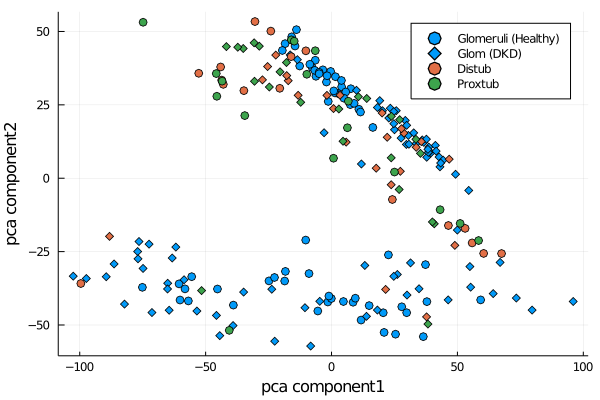

In [161]:
Plots.scatter(Yte[1,healthy.& glomeruli],Yte[2,healthy.& glomeruli],color=1,label="Glomeruli (Healthy)",marker=:o)
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,.!(healthy).& glomeruli],Yte[2,.!(healthy).& glomeruli],color=1,label="Glom (DKD)",marker=:d)
Plots.scatter!(Yte[1,healthy.& distTub],Yte[2,healthy.& distTub],color=2,label="Distub",marker=:o)
Plots.scatter!(Yte[1,.!(healthy).& distTub],Yte[2,.!(healthy).& distTub],color=2,label=:none, marker=:d)
Plots.scatter!(Yte[1,healthy.& proxTub],Yte[2,healthy.& proxTub],color=3,label="Proxtub",marker=:o)
Plots.scatter!(Yte[1,.!(healthy).& proxTub],Yte[2,.!(healthy).& proxTub],color=3,label=:none, marker=:d)

In [162]:
Plots.png("glomAndTubs.png")

In [163]:
glomPath = features[!,"pathology"];
glomPath = [ ismissing(x) ? "a" : x for x in glomPath ]

231-element Vector{String}:
 "abnormal"
 "abnormal"
 "abnormal"
 "abnormal"
 "abnormal"
 "abnormal"
 "abnormal"
 "abnormal"
 "abnormal"
 "abnormal"
 "abnormal"
 "abnormal"
 "abnormal"
 ⋮
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "healthy"
 "healthy"

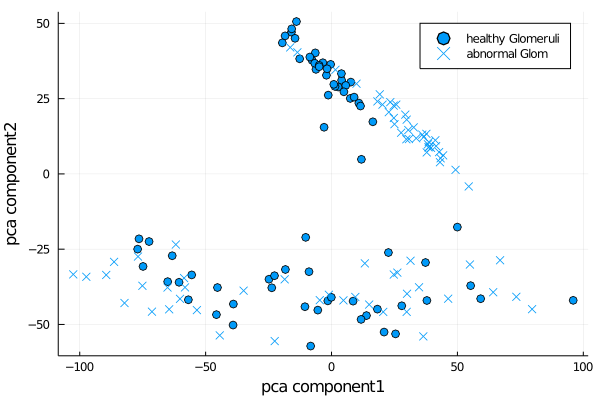

In [164]:
Plots.scatter(Yte[1,glomPath.=="healthy"],Yte[2,glomPath.=="healthy"],color=1,label="healthy Glomeruli",marker=:o)
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,glomPath.=="abnormal"],Yte[2,glomPath.=="abnormal"],color=1,label="abnormal Glom",marker=:x)


In [165]:
Plots.png("glomeruli.png")

In [33]:
names(PCM)

232-element Vector{String}:
 "TargetName"
 "disease3_scan | 001 | PanCK"
 "disease3_scan | 001 | neg"
 "disease3_scan | 002 | PanCK"
 "disease3_scan | 002 | neg"
 "disease3_scan | 003 | PanCK"
 "disease3_scan | 003 | neg"
 "disease3_scan | 004 | PanCK"
 "disease3_scan | 004 | neg"
 "disease3_scan | 005 | PanCK"
 "disease3_scan | 005 | neg"
 "disease3_scan | 006 | PanCK"
 "disease3_scan | 006 | neg"
 ⋮
 "disease1B_scan | 013 | Geometric Segment"
 "disease1B_scan | 014 | Geometric Segment"
 "disease1B_scan | 015 | Geometric Segment"
 "disease1B_scan | 016 | Geometric Segment"
 "disease1B_scan | 017 | Geometric Segment"
 "disease1B_scan | 018 | Geometric Segment"
 "disease1B_scan | 019 | Geometric Segment"
 "disease1B_scan | 020 | Geometric Segment"
 "disease1B_scan | 021 | Geometric Segment"
 "disease1B_scan | 022 | Geometric Segment"
 "disease1B_scan | 023 | Geometric Segment"
 "disease1B_scan | 024 | Geometric Segment"

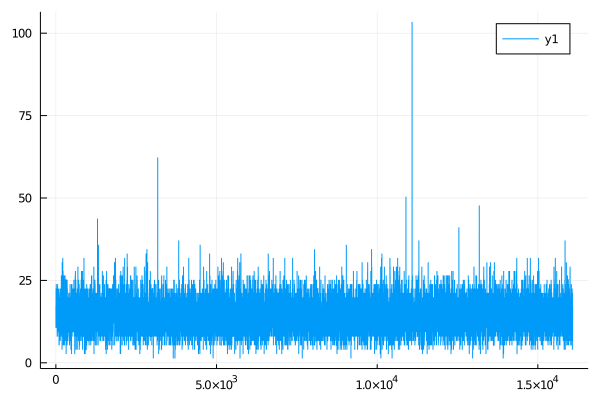

In [32]:
Plots.plot(PCM[!,"normal2B_scan | 008 | PanCK"])

In [25]:
modePerRegion=[argmax(PCM[!,nn]) for nn in names(PCM)];

In [27]:
Plots.histogram(modePerRegion)

# GSEA

In [10]:
ssGSEA = DataFrame(CSV.File("data/Kidney_ssGSEA.txt"))

1674×232 DataFrame
  Row │ Column1                            DSP.1001250007851.H.A02  DSP.100125 ⋯
      │ String                             Float64                  Float64    ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2-LTR circle formation                          0.341306               ⋯
    2 │ A tetrasaccharide linker sequenc…               0.11526
    3 │ Abacavir metabolism                             0.142778
    4 │ Abacavir transmembrane transport               -0.197259
    5 │ Abacavir transport and metabolism              -0.00453087             ⋯
    6 │ ABC transporter disorders                       0.269915
    7 │ ABC transporters in lipid homeos…              -0.0902464
    8 │ ABC-family proteins mediated tra…               0.193739
    9 │ Abortive elongation of HIV-1 tra…               0.211537               ⋯
   10 │ Acetylcholine binding and downst…              -0.142005
   11 │ Acetylcholine Neurotransmitter R…              -0.0759436
  ⋮   │                 ⋮                             ⋮                        ⋱
 1665 │ WNT mediated activation of DVL                  0.327254
 1666 │ WNT5A-dependent internalization …               0.298216               ⋯
 1667 │ WNT5A-dependent internalization …               0.353903
 1668 │ XBP1(S) activates chaperone genes               0.278942
 1669 │ Xenobiotics                                    -0.0357739
 1670 │ YAP1- and WWTR1 (TAZ)-stimulated…               0.212964               ⋯
 1671 │ ZBP1(DAI) mediated induction of …               0.228587
 1672 │ Zinc efflux and compartmentaliza…               0.0198401
 1673 │ Zinc influx into cells by the SL…               0.0875672
 1674 │ Zinc transporters                               0.0612743              ⋯
                                               230 columns and 1653 rows omitted

In [11]:
names(ssGSEA)

232-element Vector{String}:
 "Column1"
 "DSP.1001250007851.H.A02"
 "DSP.1001250007851.H.A03"
 "DSP.1001250007851.H.A04"
 "DSP.1001250007851.H.A05"
 "DSP.1001250007851.H.A06"
 "DSP.1001250007851.H.A07"
 "DSP.1001250007851.H.A08"
 "DSP.1001250007851.H.A09"
 "DSP.1001250007851.H.A10"
 "DSP.1001250007851.H.A11"
 "DSP.1001250007851.H.A12"
 "DSP.1001250007851.H.B01"
 ⋮
 "DSP.1002510007866.C.G12"
 "DSP.1002510007866.C.H01"
 "DSP.1002510007866.C.H03"
 "DSP.1002510007866.C.H04"
 "DSP.1002510007866.C.H05"
 "DSP.1002510007866.C.H06"
 "DSP.1002510007866.C.H07"
 "DSP.1002510007866.C.H08"
 "DSP.1002510007866.C.H09"
 "DSP.1002510007866.C.H10"
 "DSP.1002510007866.C.H11"
 "DSP.1002510007866.C.H12"

In [18]:
groupPerRegion=[ssGSEA[argmax(ssGSEA[!,nn]),"Column1"] for nn in names(ssGSEA)];

In [19]:
groupPerRegion

232-element Vector{String}:
 "truncated APC mutants destabilize the destruction complex"
 "LRR FLII-interacting protein 1 (LRRFIP1) activates type I IFN production"
 "LRR FLII-interacting protein 1 (LRRFIP1) activates type I IFN production"
 "Formation of ATP by chemiosmotic coupling"
 "LRR FLII-interacting protein 1 (LRRFIP1) activates type I IFN production"
 "LRR FLII-interacting protein 1 (LRRFIP1) activates type I IFN production"
 "SUMO is conjugated to E1 (UBA2:SAE1)"
 "NOSTRIN mediated eNOS trafficking"
 "Noncanonical activation of NOTCH3"
 "Translation initiation complex formation"
 "Defective LFNG causes SCDO3"
 "LRR FLII-interacting protein 1 (LRRFIP1) activates type I IFN production"
 "LRR FLII-interacting protein 1 (LRRFIP1) activates type I IFN production"
 ⋮
 "SUMO is conjugated to E1 (UBA2:SAE1)"
 "Formation of ATP by chemiosmotic coupling"
 "Formation of ATP by chemiosmotic coupling"
 "Formation of ATP by chemiosmotic coupling"
 "Formation of ATP by chemiosmotic coupling

In [23]:
s=unique(groupPerRegion);

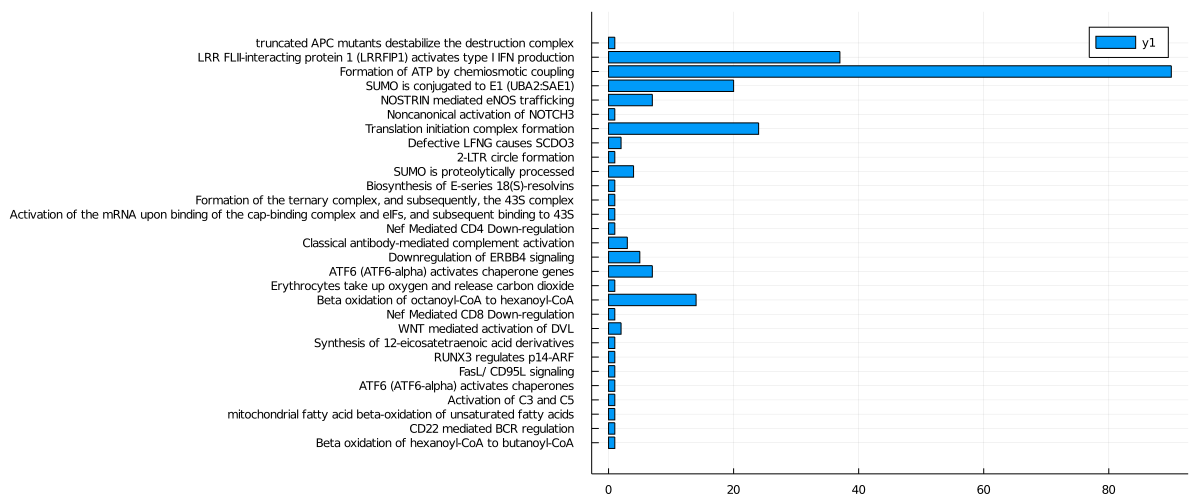

In [30]:
datamap = countmap(groupPerRegion)
bar((x -> datamap[x]).(s), yticks=(1:length(s), s),orientation = :horizontal,yflip=true,size=(1200,500))

In [31]:
png("GEA_histogram.png")